In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from laptrack import LapTrack

# Ground truth track (75pM)

In [2]:
df_gt = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/75pM/dt_2/filtered_tracks/test_ground_truth.csv')

In [160]:
df_gt.groupby('track_id').size() # find longest track

track_id
0       34
3       31
4      151
6       12
7      159
19      34
20      72
27      52
32      42
37     112
52      30
65     123
70      21
101     36
124     17
129     34
132     22
142     21
144     11
155     18
156     12
164     11
169     12
174     28
192     12
195     87
dtype: int64

In [161]:
df_gt_long = df_gt[df_gt.track_id == 7]

In [162]:
df_gt_long = df_gt_long.sort_values(by=['frame'])

# Experimental track

In [163]:
df_exp_detections = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/75pM/dt_2/filtered_tracks/exp_75pM_seq_0.csv')

In [164]:
df_exp_detections = df_exp_detections[['frame','x','y']]

In [165]:
track_cost_cutoff = 1.0
gap_closing_cost_cutoff = 2.0
gap_closing_max_frame_count = 3

In [166]:
lt = LapTrack(track_cost_cutoff=track_cost_cutoff**2,track_dist_metric='sqeuclidean',gap_closing_cost_cutoff=gap_closing_cost_cutoff**2,gap_closing_max_frame_count=gap_closing_max_frame_count) # track_cost_cutoff and gap_closing_cutoff should be the squared maximum distance", 
track_df, _, _ = lt.predict_dataframe(df_exp_detections, ["y", "x"], only_coordinate_cols=False,validate_frame=False)
track_df = track_df.reset_index()
track_df = track_df[['x','y','frame','track_id']]
u, c = np.unique(track_df.track_id.values, return_counts=True)
dup = u[c > 1]
track_m = track_df[track_df.track_id.isin(dup)]

In [7]:
track_m

,x,y,frame,track_id
0,0.987677,3.147909,0,0
1,13.632747,27.343085,0,1
2,26.116184,11.031556,0,2
3,33.256542,20.189831,0,3
4,15.691456,2.116117,0,4
...,...,...,...,...
1853,1.979563,5.639780,198,600
1854,2.737947,13.340502,199,603
1856,10.693339,1.556989,199,555
1857,22.622093,15.821248,199,595


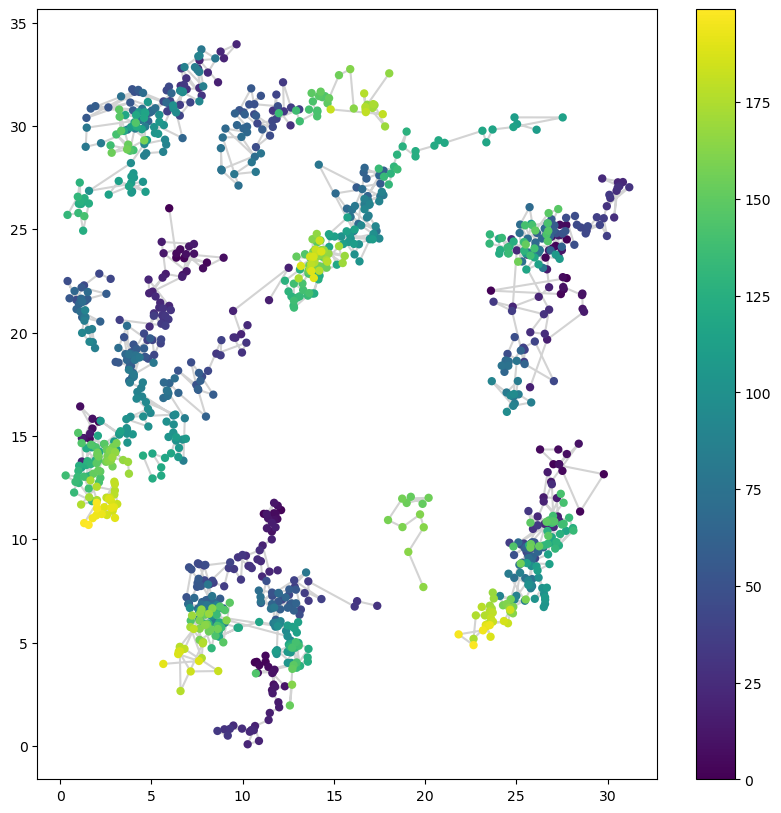

In [28]:
fig,ax = plt.subplots(figsize=(10,10))

df_gt.sort_values(by=['frame'],inplace=True)

a = ax.scatter(data=df_gt,x='x',y='y',c='frame',cmap='viridis',linewidth=0)

for df in df_gt.track_id.unique():
    b = df_gt[df_gt.track_id == df]

# b = df_gt[df_gt.track_id == 7]
# b.sort_values(by=['frame'],inplace=True)
    ax.plot(b.x.values,b.y.values,color='lightgray',zorder=0)

# plt.ylim(10,30)
# plt.xlim(0,15)

fig.colorbar(a)


In [167]:
track_m.rename(columns={'x':'a'},inplace=True)
track_m.rename(columns={'y':'x'},inplace=True)
track_m.rename(columns={'a':'y'},inplace=True)

/scratch/louaness/ipykernel_237026/3374208685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'x':'a'},inplace=True)
/scratch/louaness/ipykernel_237026/3374208685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'y':'x'},inplace=True)
/scratch/louaness/ipykernel_237026/3374208685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'a':'y'},inplace=True)


In [168]:
t = track_m.groupby('track_id').size()[track_m.groupby('track_id').size() > 40]

In [169]:
track_filtered = track_m[track_m.track_id.isin(t.index)]

<AxesSubplot: xlabel='x', ylabel='y'>

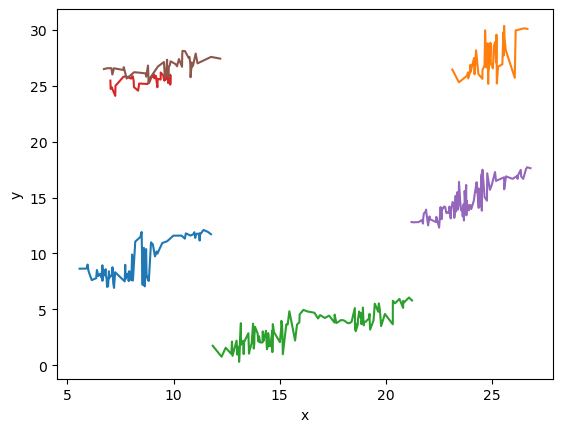

In [23]:
sns.lineplot(data=track_filtered,x='x',y='y',hue='track_id',legend=False,palette='tab10')

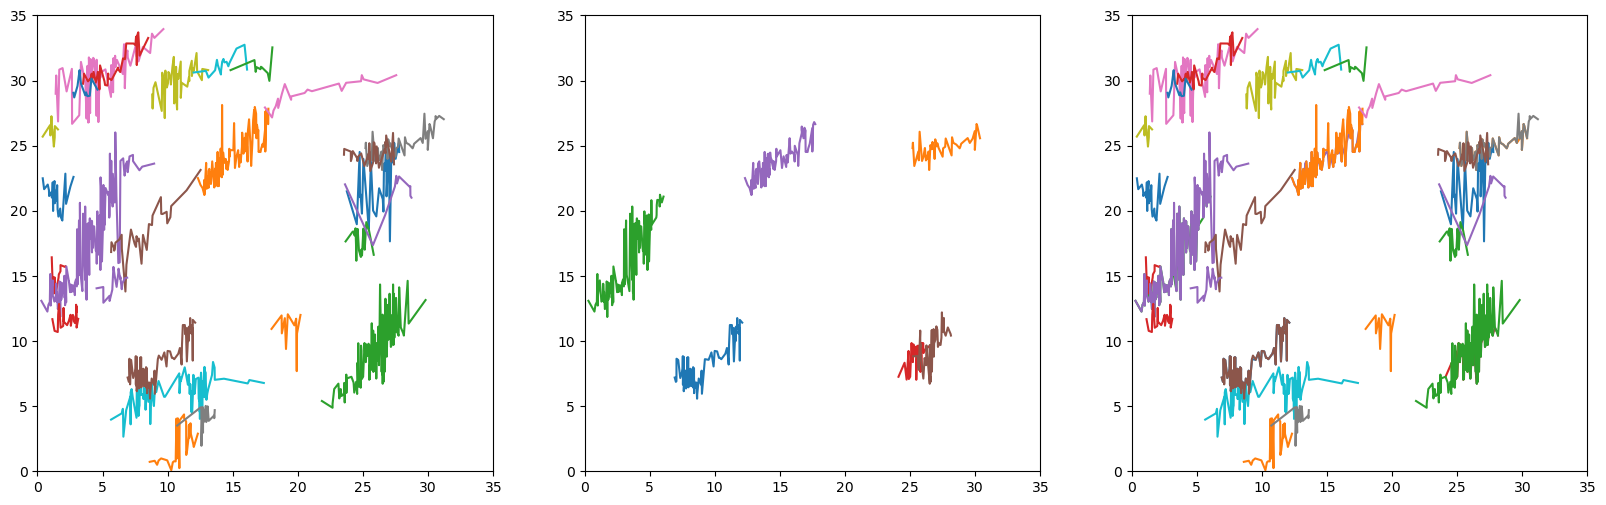

In [30]:
fig,ax = plt.subplots(1,3,figsize=(20,10))

sns.lineplot(data=df_gt,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[0])
sns.lineplot(data=track_filtered,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[1])

sns.lineplot(data=track_filtered,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2])
sns.lineplot(data=df_gt,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2])

for a in ax:
    a.set_xlim(0,35)
    a.set_ylim(0,35)
    a.set_ylabel('')
    a.set_xlabel('')
    a.set_aspect('equal')

In [37]:
tr = pd.merge(df_gt,track_filtered,on=['x','y','frame'],suffixes=('_gt','_pred'))

In [38]:
tr

,track_id_gt,x,y,frame,track_id_pred
0,4,25.773100,10.801309,149,362
1,4,25.650202,8.000230,91,154
2,4,27.183171,9.687165,120,362
3,4,26.656985,10.845645,150,362
4,4,25.819676,7.788077,92,154
...,...,...,...,...,...
436,195,7.876512,6.589862,65,6
437,195,7.529905,7.887032,54,6
438,195,8.640745,5.573879,90,6
439,195,8.326916,7.248507,78,6


In [39]:
def compute_IoU(df1:pd.DataFrame,df2:pd.DataFrame) -> pd.DataFrame:
    """
    :param df1: track dataframe
    :param df2: ground_truth dataframe
    :return: a pandas dataframe with matched points and the associated IoU's
    """
    df1 = df1.reset_index()
    df2 = df2.reset_index()
    df1 = df1[['x','y','frame','track_id']]
    df2 = df2[['x','y','frame','track_id']]
    df = pd.merge(df1,df2,on=['x','y','frame'])
    df.rename(columns={'track_id_x':'track_id1','track_id_y':'track_id2'},inplace=True)

    n_common_spot = df.groupby(['track_id1','track_id2']).size().reset_index(name='count')

    n_common_spot['iou'] = n_common_spot.apply(lambda x: x['count']/((len(df1[df1.track_id==x['track_id1']])+len(df2[df2.track_id==x['track_id2']]))-x['count']),axis=1)

    return n_common_spot

In [35]:
df_gt_long

,track_id,x,y,frame
284,7,2.035606,14.079963,149
285,7,3.659937,18.677546,66
286,7,5.532249,19.667357,43
287,7,4.185262,16.802776,92
288,7,1.751983,14.506469,120
...,...,...,...,...
438,7,3.934770,17.807042,65
439,7,5.152473,18.918689,42
440,7,4.487827,16.900548,90
441,7,1.994678,13.680943,148


In [37]:
track_m

,x,y,frame,track_id
0,0.987677,3.147909,0,0
1,13.632747,27.343085,0,1
2,26.116184,11.031556,0,2
3,33.256542,20.189831,0,3
4,15.691456,2.116117,0,4
...,...,...,...,...
1853,1.979563,5.639780,198,344
1854,2.737947,13.340502,199,339
1856,10.693339,1.556989,199,328
1857,22.622093,15.821248,199,336


In [ ]:
track_m.rename(columns={'x':'a'},inplace=True)
track_m.rename(columns={'y':'x'},inplace=True)
track_m.rename(columns={'a':'y'},inplace=True)

In [33]:
df_g = compute_IoU(track_m,df_gt_long)

In [30]:
track_m[track_m.track_id==10]

,x,y,frame,track_id


In [34]:
df_g

,track_id1,track_id2,count,iou


In [8]:
def change_param(track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count,ax):
    lt = LapTrack(track_cost_cutoff=track_cost_cutoff**2,track_dist_metric='sqeuclidean',gap_closing_cost_cutoff=gap_closing_cost_cutoff**2,gap_closing_max_frame_count=gap_closing_max_frame_count) # track_cost_cutoff and gap_closing_cutoff should be the squared maximum distance", 
    track_df, _, _ = lt.predict_dataframe(df_exp_detections, ["y", "x"], only_coordinate_cols=False,validate_frame=False)
    track_df = track_df.reset_index()
    track_df = track_df[['x','y','frame','track_id']]
    u, c = np.unique(track_df.track_id.values, return_counts=True)
    dup = u[c > 1]
    track_m = track_df[track_df.track_id.isin(dup)].copy(deep=True)
    track_m.rename(columns={'x':'a'},inplace=True)
    track_m.rename(columns={'y':'x'},inplace=True)
    track_m.rename(columns={'a':'y'},inplace=True)
    df_g = compute_IoU(track_m,df_gt_long)

    sns.scatterplot(data=df_gt_long,x='x',y='y',marker='.',linewidth=0,ax=ax)
    ax.plot(df_gt_long.x.values,df_gt_long.y.values,linestyle='--',color='black',zorder=0)
    # ax.set_xticks([])
    # ax.set_yticks([])
    m = track_m[track_m.track_id == df_g[df_g.iou == max(df_g.iou)].track_id1.values[0]].copy(deep=True)
    m['x'] = m['x'] - 5
    sns.scatterplot(data=m,x='x',y='y',marker='.',linewidth=0,ax=ax)
    ax.plot(m.x.values,m.y.values,linestyle='--',color='black',zorder=0)
    ax.set_title(f'track_cost_cutoff:{track_cost_cutoff}\ngap_closing_cost_cutoff:{gap_closing_cost_cutoff}\ngap_closing_max_frame_count:{gap_closing_max_frame_count}\n IoU:{max(df_g.iou)}')
    # plt.close()
    
    return m

In [67]:
change_param(1,2,2)

In [68]:
change_param(1,2,1)

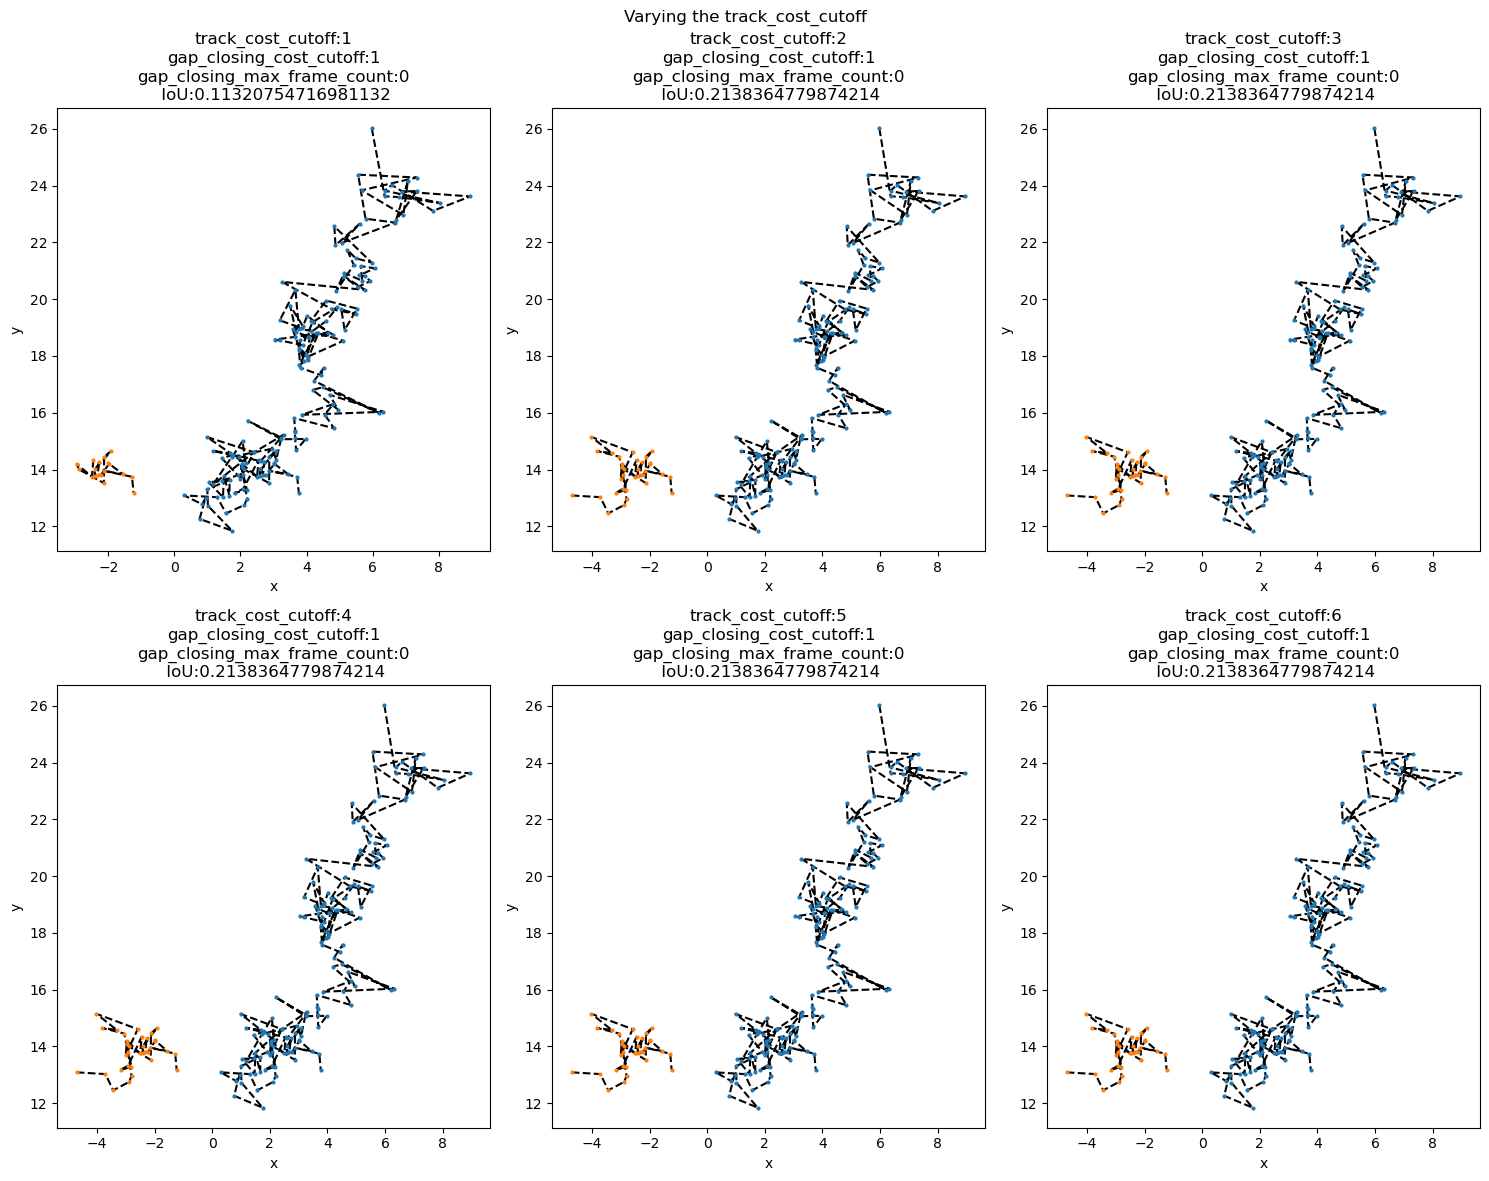

In [94]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for i,j,k,l in zip([1,2,3,4,5,6],[1,1,1,1,1,1],[0,0,0,0,0,0],range(6)):
    change_param(i,j,k,ax[l])

fig.suptitle('Varying the track_cost_cutoff')
fig.tight_layout()

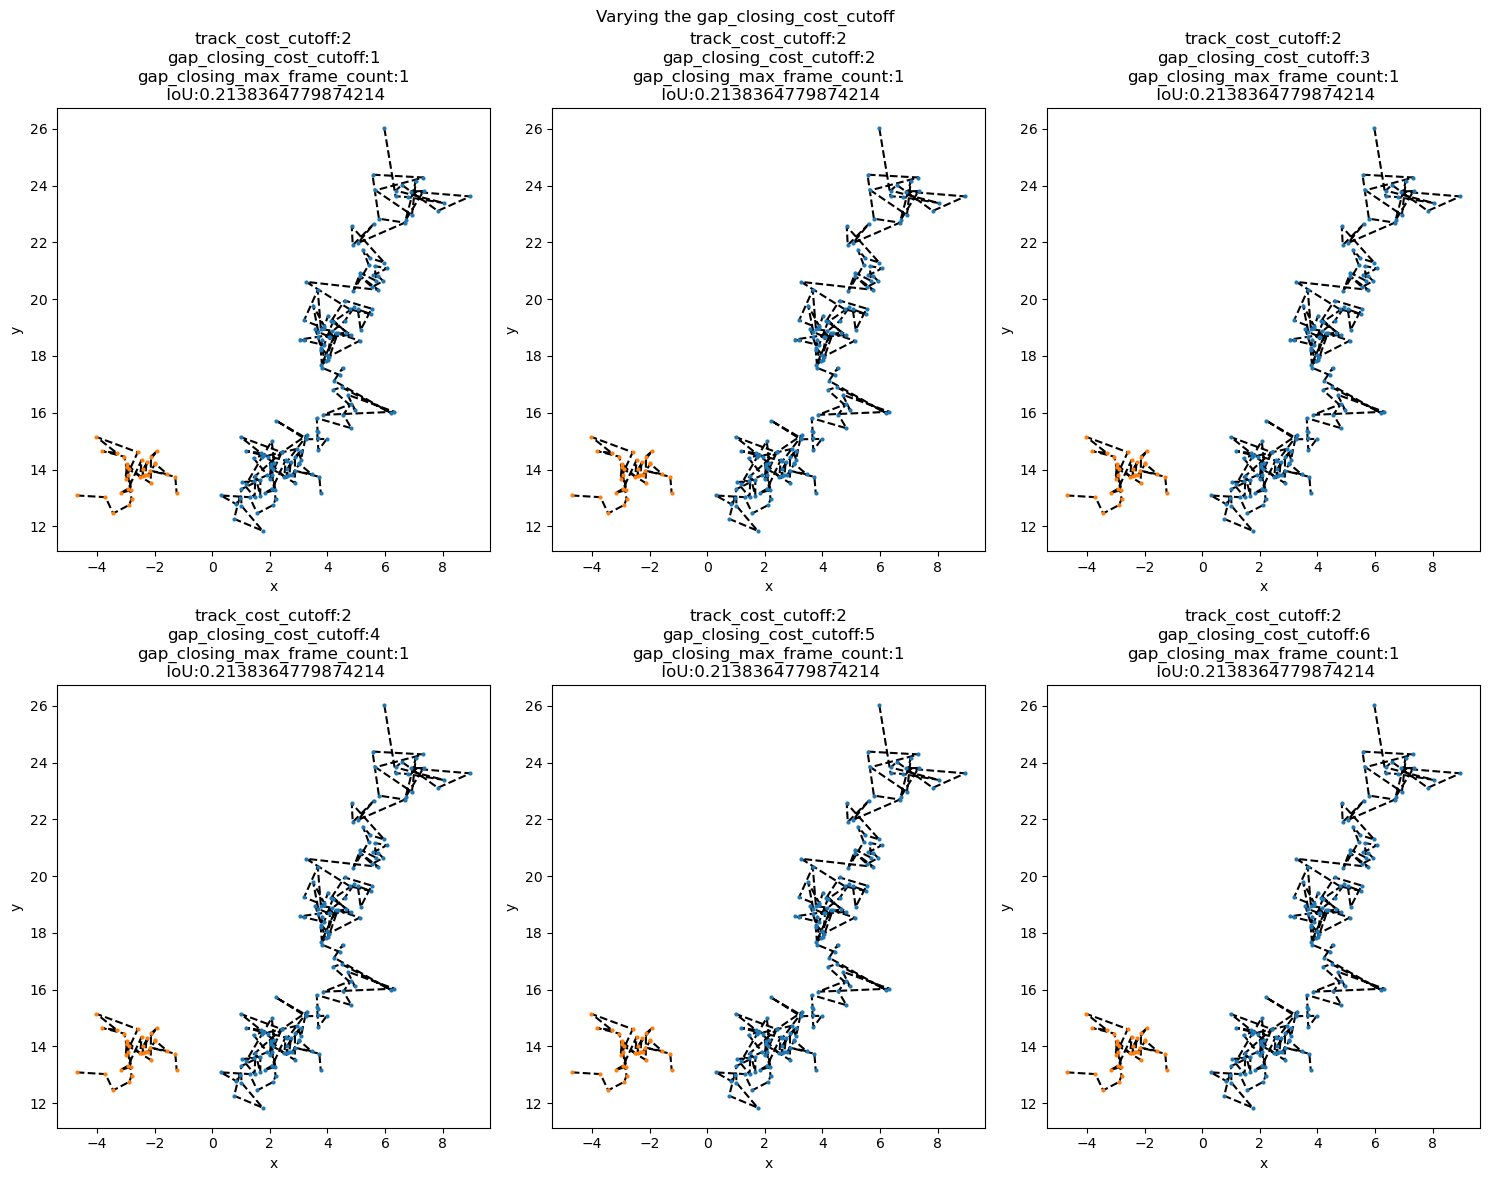

In [95]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for j,l in zip([1,2,3,4,5,6],range(6)):
    change_param(2,j,1,ax[l])

fig.suptitle('Varying the gap_closing_cost_cutoff')
fig.tight_layout()

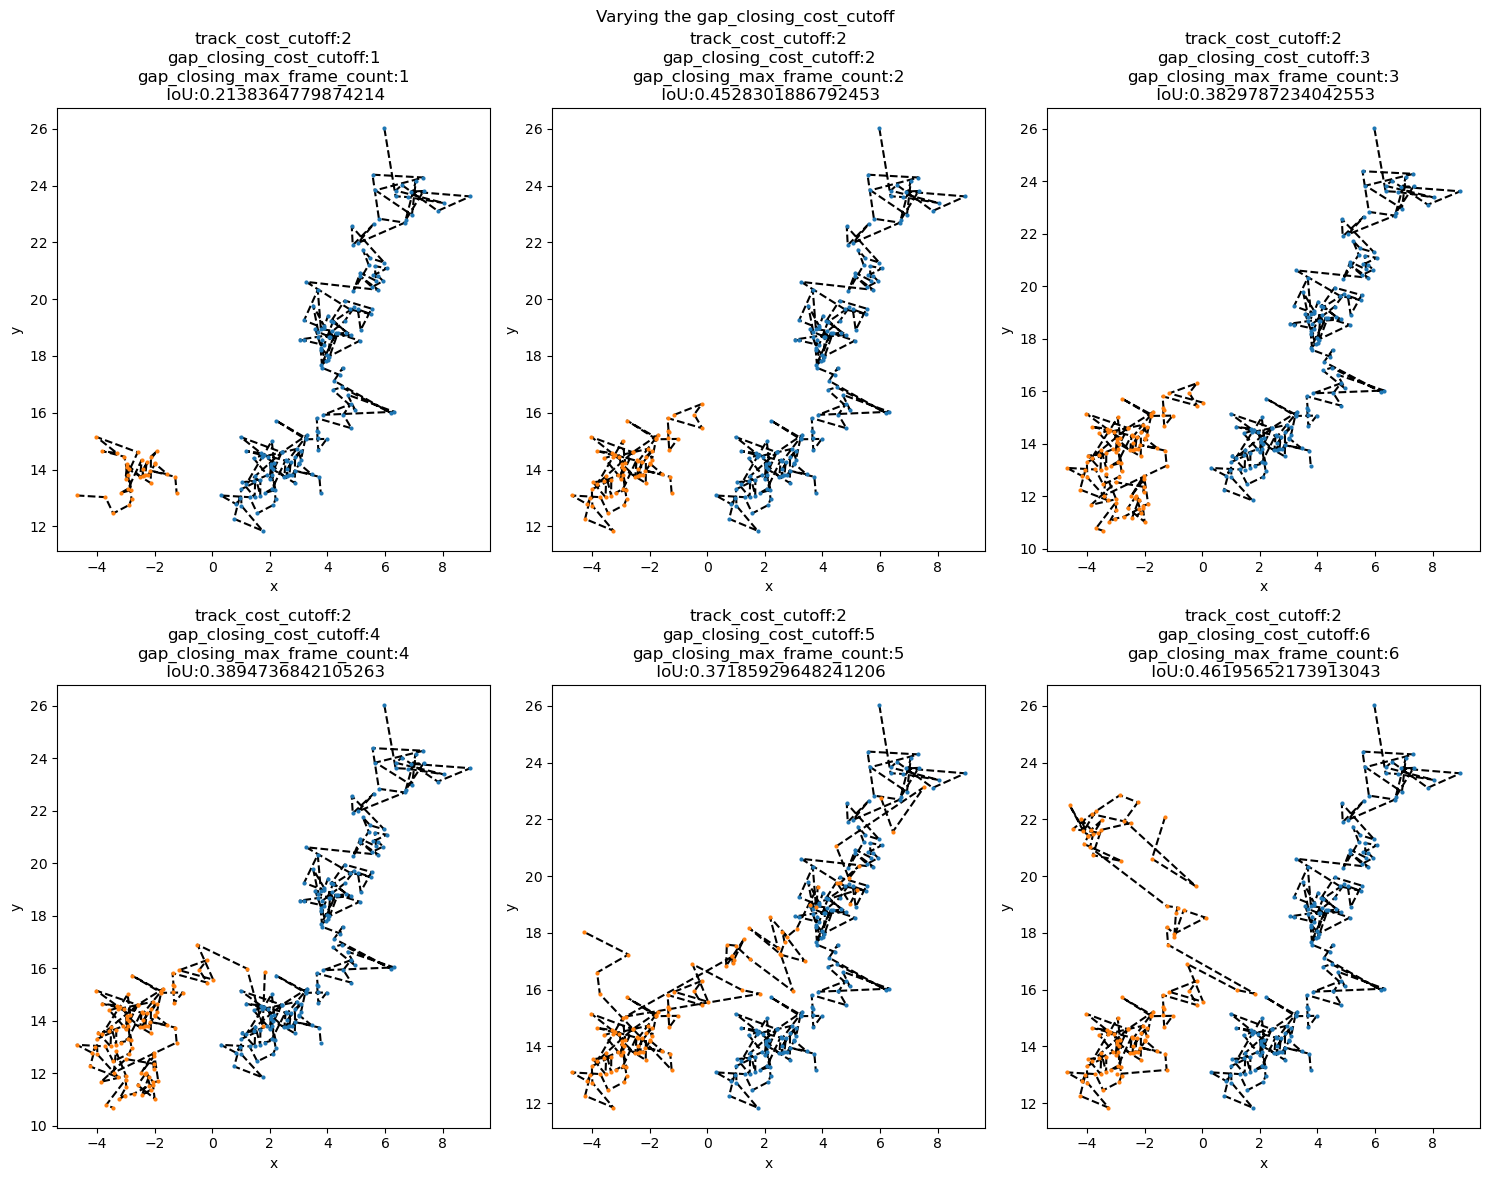

In [96]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for j,k,l in zip([1,2,3,4,5,6],[1,2,3,4,5,6],range(6)):
    change_param(2,j,k,ax[l])

fig.suptitle('Varying the gap_closing_cost_cutoff')
fig.tight_layout()

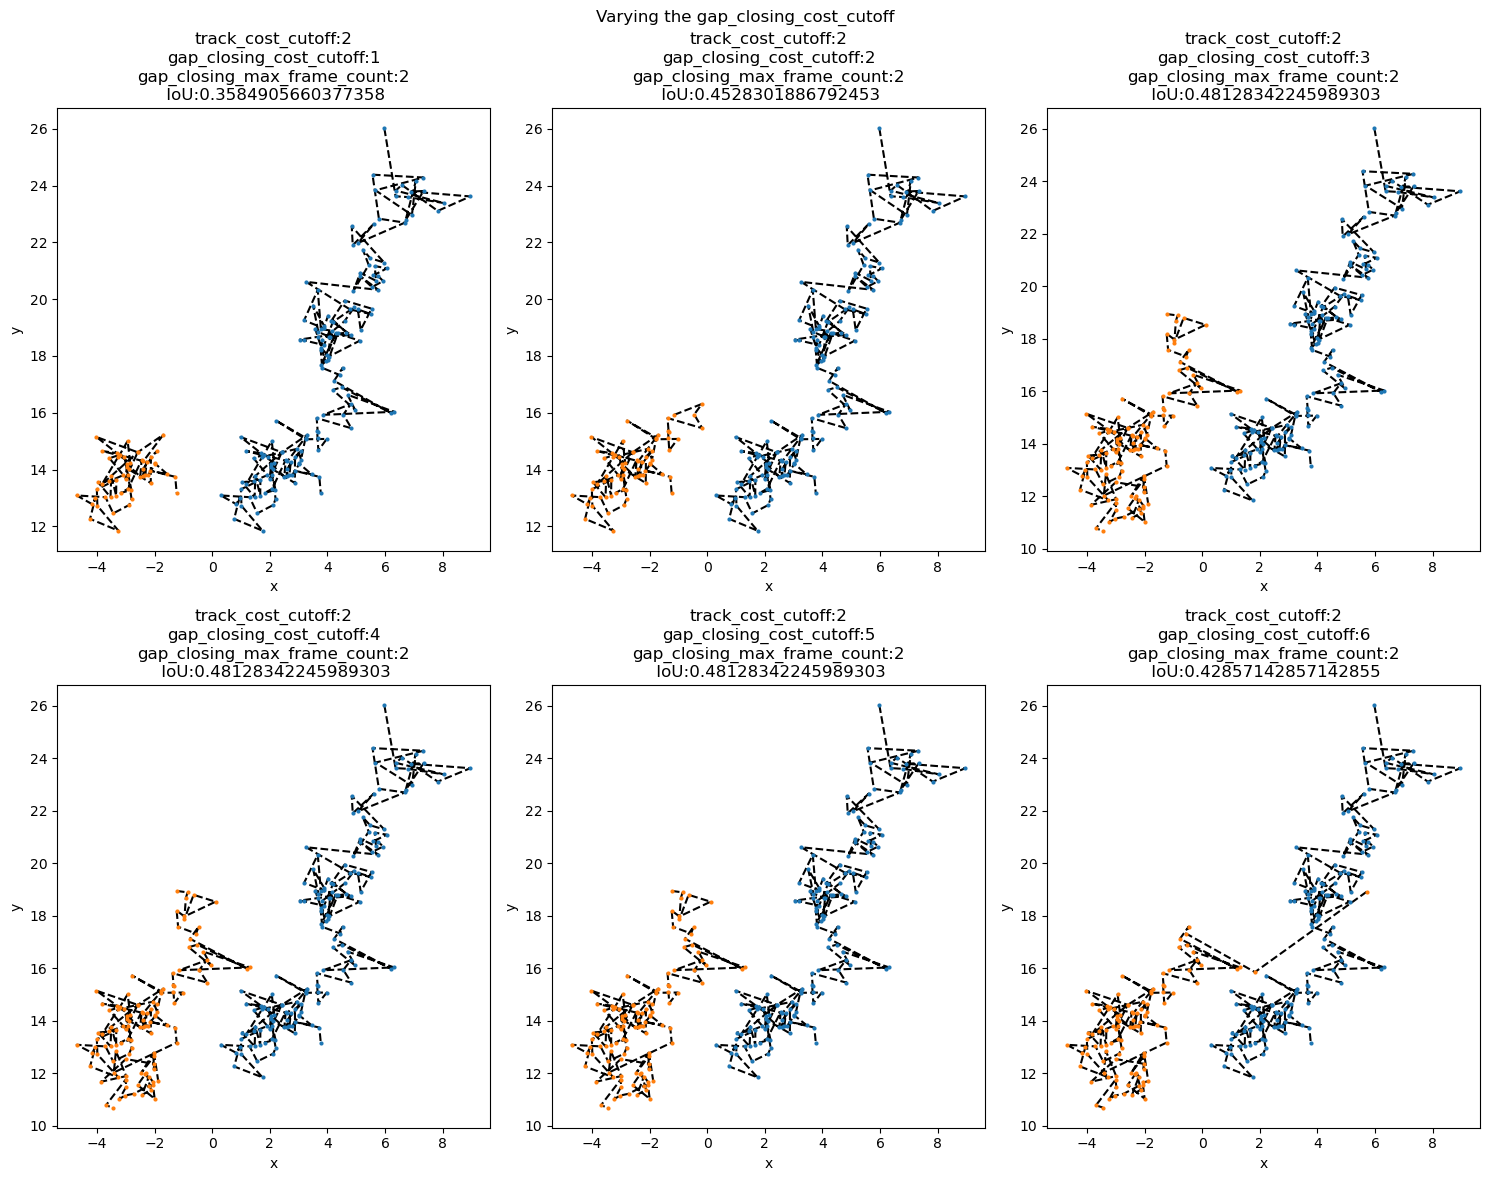

In [97]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for j,l in zip([1,2,3,4,5,6],range(6)):
    change_param(2,j,2,ax[l])

fig.suptitle('Varying the gap_closing_cost_cutoff')
fig.tight_layout()

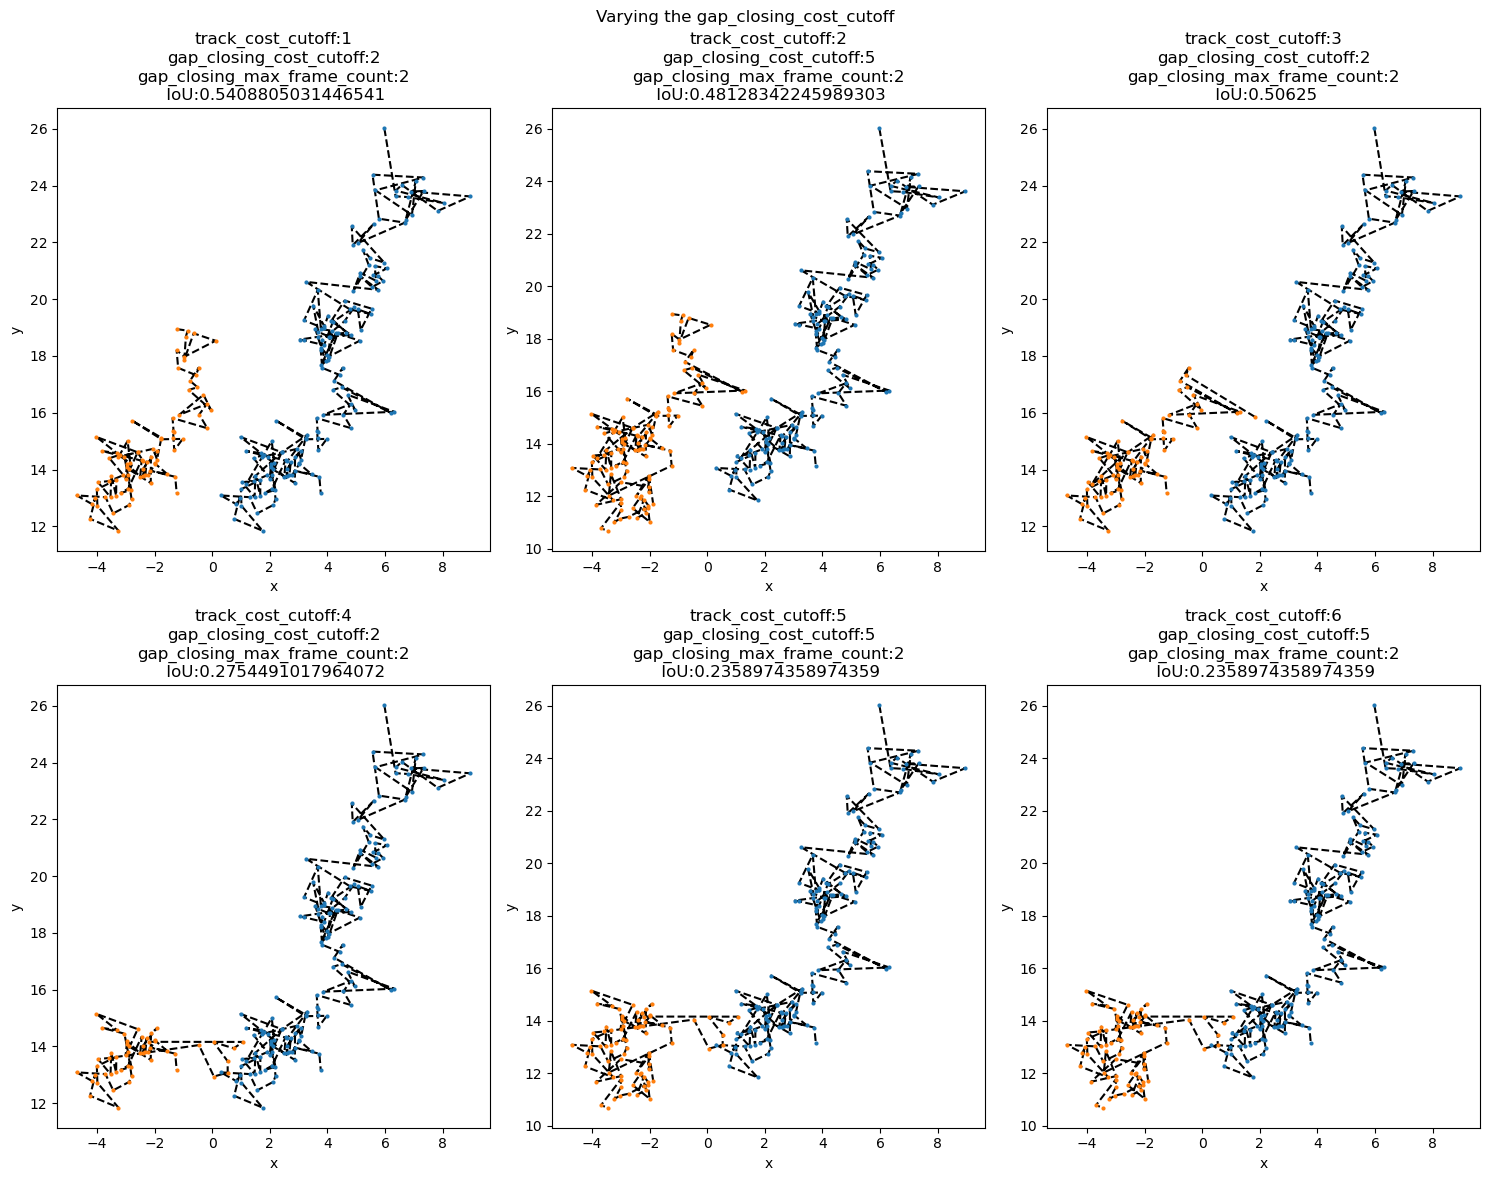

In [98]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for j,k,l in zip([1,2,3,4,5,6],[2,5,2,2,5,5],range(6)):
    change_param(j,k,2,ax[l])

fig.suptitle('Varying the gap_closing_cost_cutoff')
fig.tight_layout()

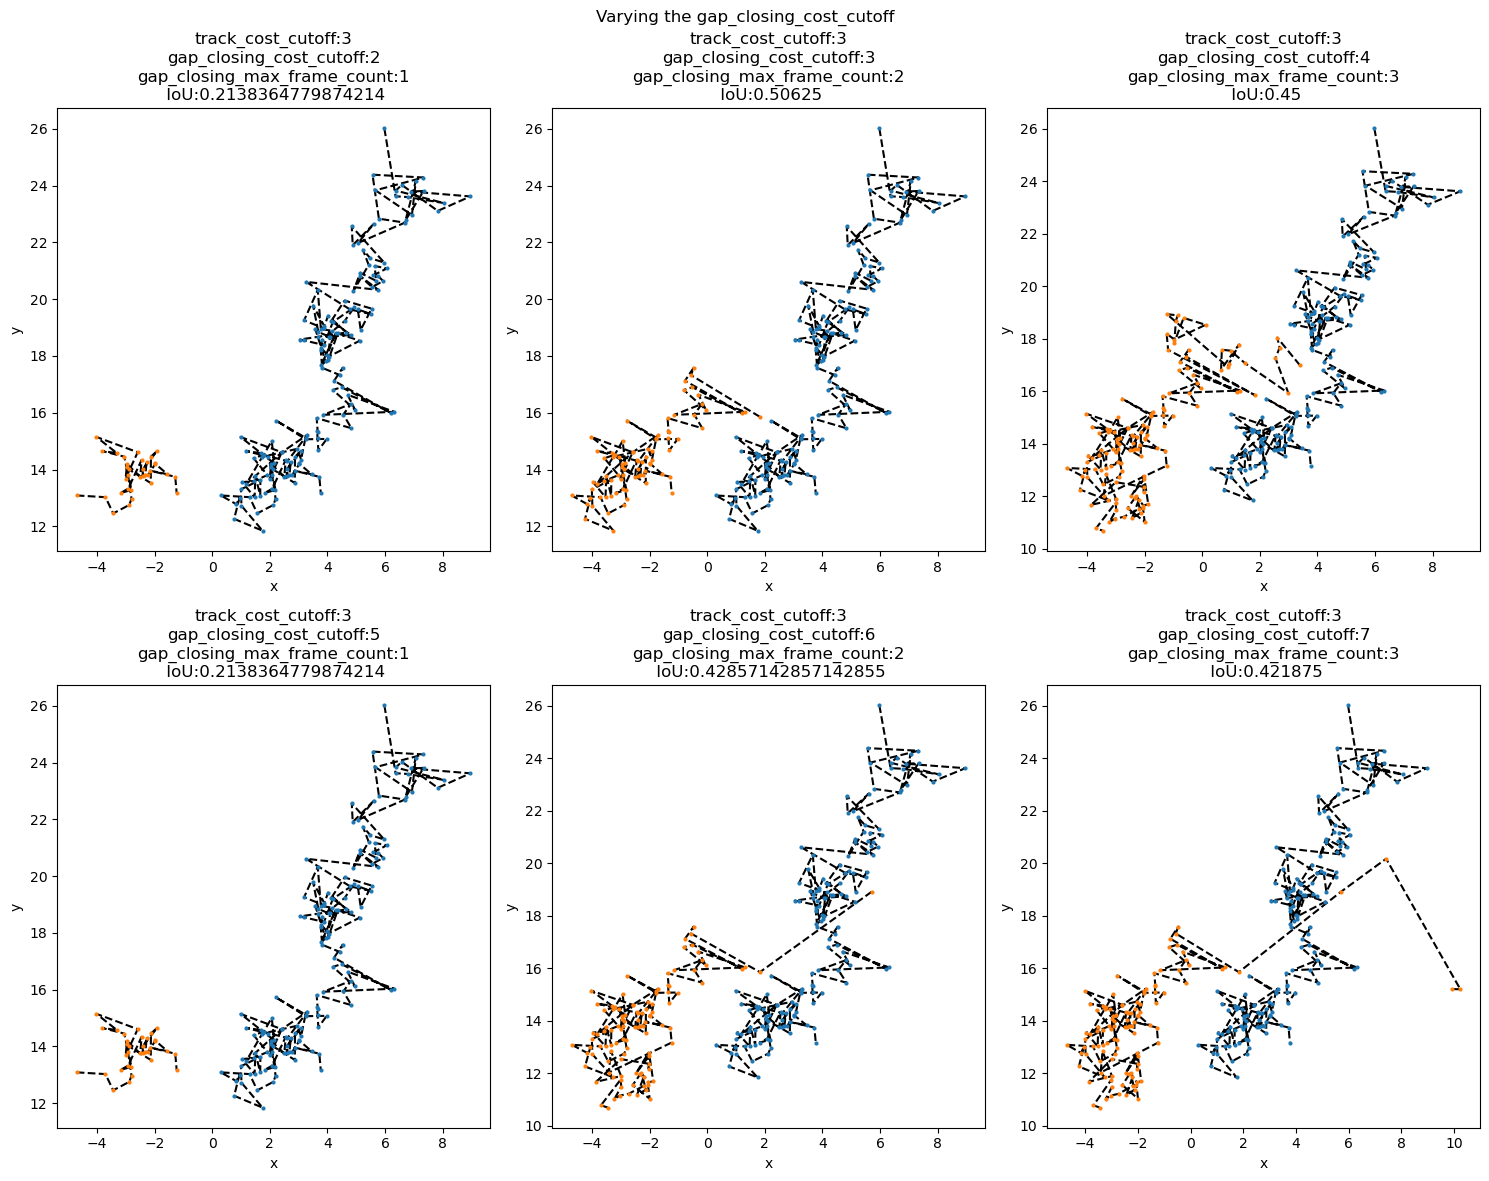

In [101]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for j,k,l in zip([1,2,3,1,2,3],[2,3,4,5,6,7],range(6)):
    change_param(3,k,j,ax[l])

fig.suptitle('Varying the gap_closing_cost_cutoff')
fig.tight_layout()

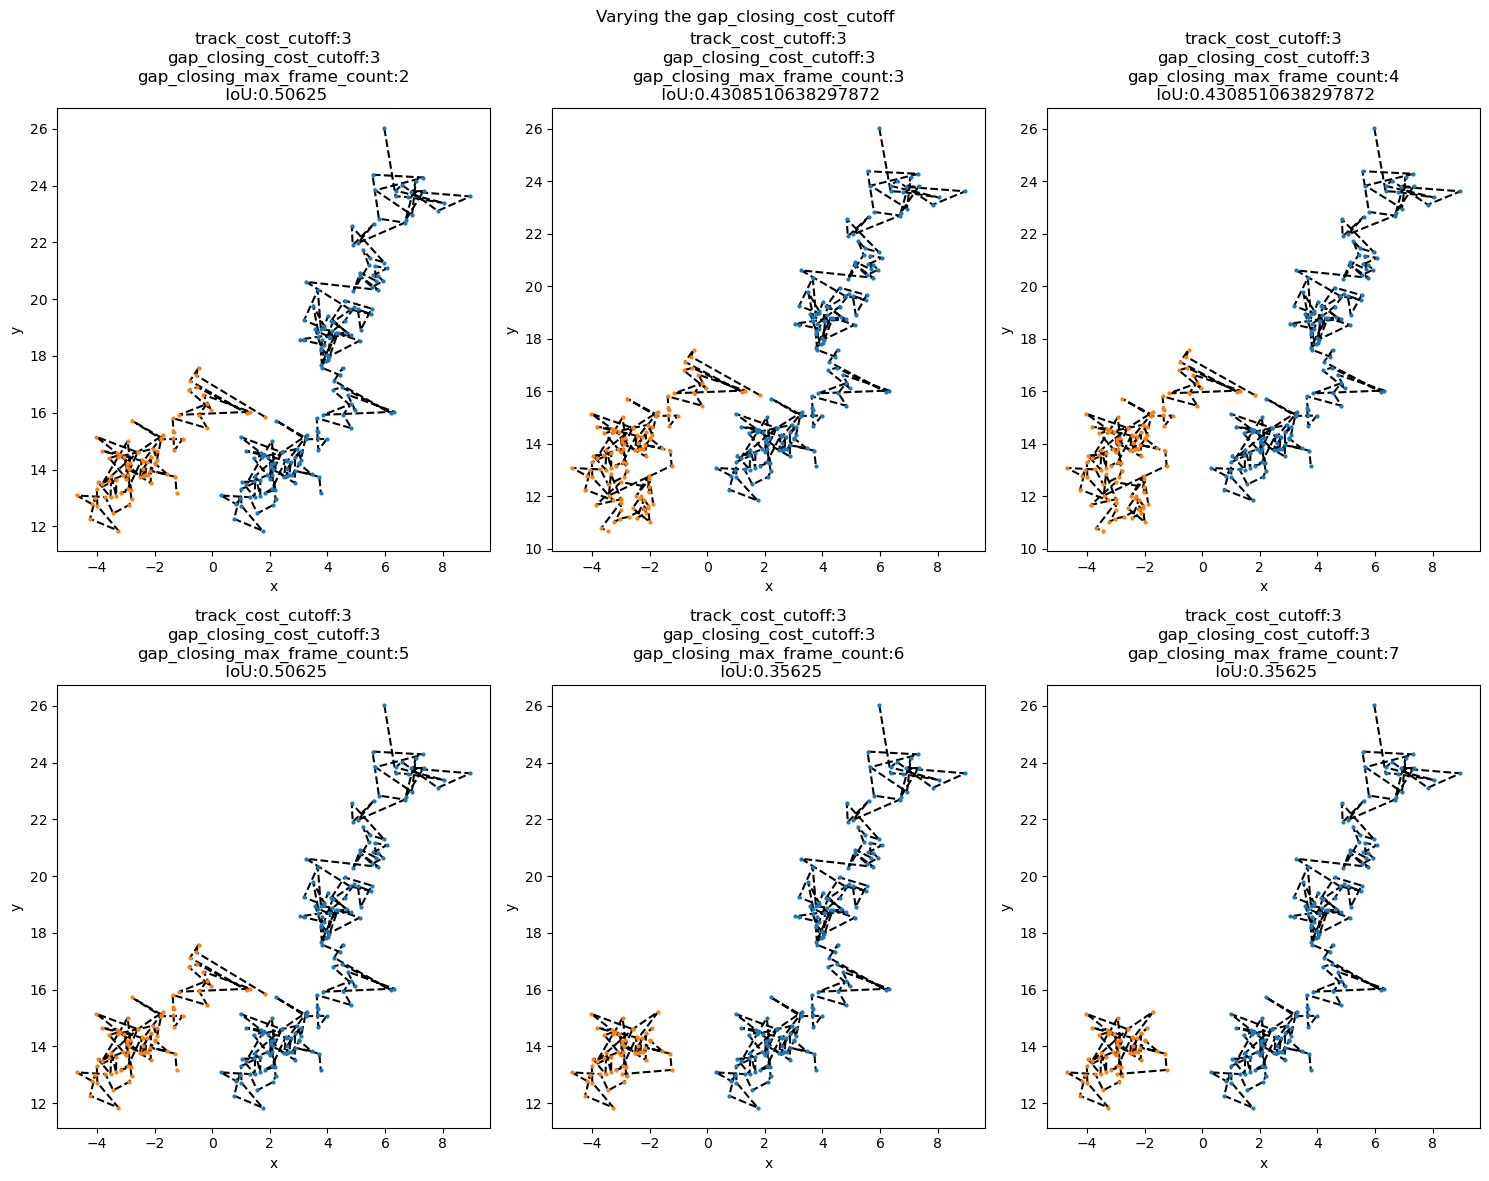

In [103]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for j,l in zip([2,3,4,5,6,7],range(6)):
    change_param(3,3,j,ax[l])

fig.suptitle('Varying the gap_closing_cost_cutoff')
fig.tight_layout()

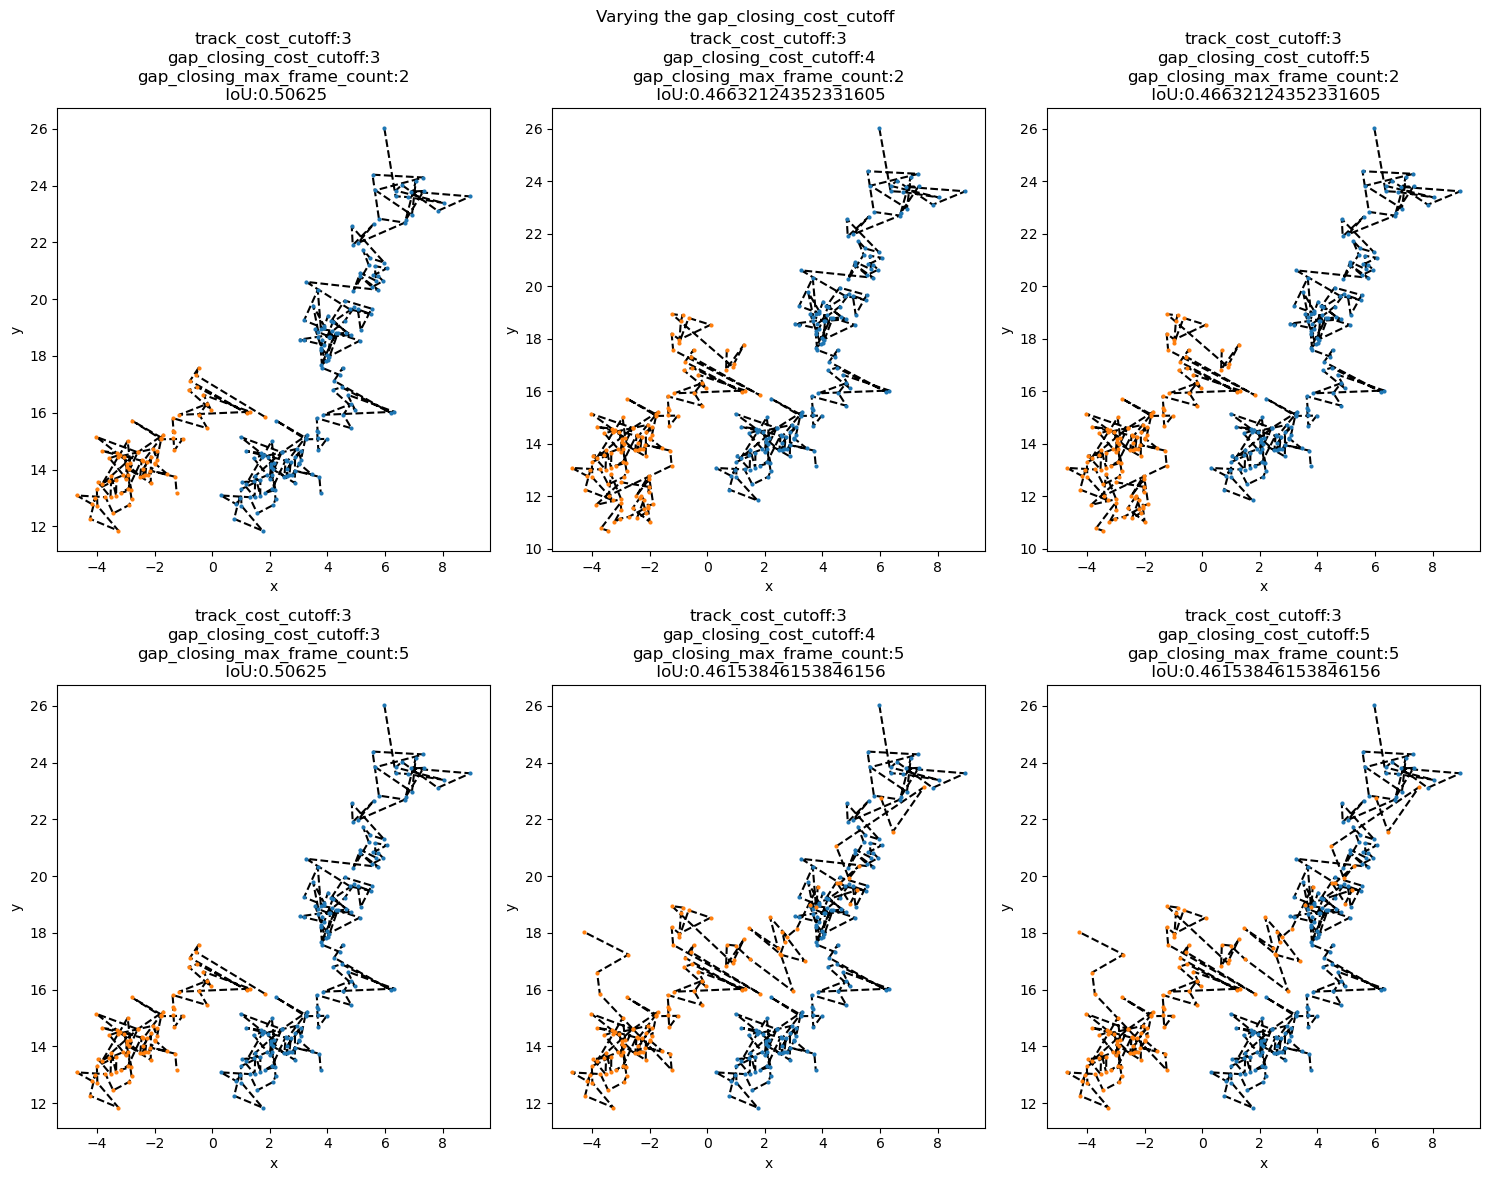

In [104]:
fig,ax = plt.subplots(2,3,figsize=(15,12))
ax = ax.flatten()

for j,k,l in zip([2,2,2,5,5,5],[3,4,5,3,4,5],range(6)):
    change_param(3,k,j,ax[l])

fig.suptitle('Varying the gap_closing_cost_cutoff')
fig.tight_layout()

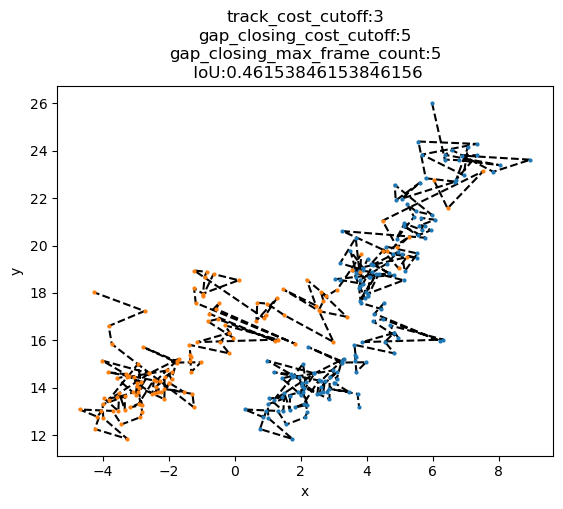

In [115]:
m = change_param(3,5,5,plt.subplot(1,1,1))

In [117]:
m['x'] = m['x'] + 5

In [120]:
m.frame.values

array([ 13,  17,  18,  19,  20,  24,  25,  26,  29,  31,  32,  35,  39,
        43,  46,  47,  50,  52,  54,  58,  59,  60,  61,  62,  64,  65,
        68,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  87,  88,  89,  90,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 172, 175, 176, 177])

In [121]:
# get the longest continuous sequence of frames in m 



In [123]:
m.frame_diff.values

array([nan,  4.,  1.,  1.,  1.,  4.,  1.,  1.,  3.,  2.,  1.,  3.,  4.,
        4.,  3.,  1.,  3.,  2.,  2.,  4.,  1.,  1.,  1.,  1.,  2.,  1.,
        3.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  3.,  1.,  1.])

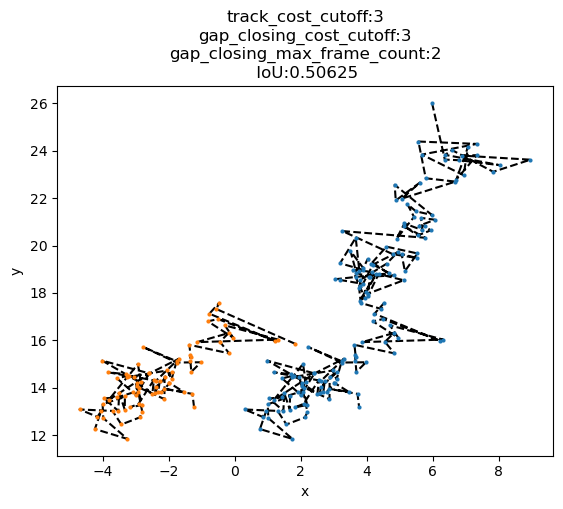

In [124]:
n = change_param(3,3,2,plt.subplot(1,1,1))

In [125]:
n['frame_diff'] = n.frame.diff()

In [127]:
n.frame.values

array([ 84,  85,  87,  88,  89,  90,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170])

In [126]:
n.frame_diff.values

array([nan,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [135]:
m.frame.values

array([ 13,  17,  18,  19,  20,  24,  25,  26,  29,  31,  32,  35,  39,
        43,  46,  47,  50,  52,  54,  58,  59,  60,  61,  62,  64,  65,
        68,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  87,  88,  89,  90,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 172, 175, 176, 177])

In [14]:
from more_itertools import consecutive_groups

# consecutive_fams = [list(group) for group in consecutive_groups(m.frame.values)]

In [141]:
l = [len(i) for i in consecutive_fams]

In [143]:
max(l)

34

In [148]:
n.frame.values

array([ 84,  85,  87,  88,  89,  90,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170])

In [9]:
def get_most_consecutive_frames(df):
    consecutive_fams = [list(group) for group in consecutive_groups(df.frame.values)]
    l = [len(i) for i in consecutive_fams]
    return max(l)

In [10]:
def change_param_fast(track_cost_cutoff,gap_closing_cost_cutoff,gap_closing_max_frame_count):
    lt = LapTrack(track_cost_cutoff=track_cost_cutoff**2,track_dist_metric='sqeuclidean',gap_closing_cost_cutoff=gap_closing_cost_cutoff**2,gap_closing_max_frame_count=gap_closing_max_frame_count) # track_cost_cutoff and gap_closing_cutoff should be the squared maximum distance", 
    track_df, _, _ = lt.predict_dataframe(df_exp_detections, ["y", "x"], only_coordinate_cols=False,validate_frame=False)
    track_df = track_df.reset_index()
    track_df = track_df[['x','y','frame','track_id']]
    u, c = np.unique(track_df.track_id.values, return_counts=True)
    dup = u[c > 1]
    track_m = track_df[track_df.track_id.isin(dup)].copy(deep=True)
    track_m.rename(columns={'x':'a'},inplace=True)
    track_m.rename(columns={'y':'x'},inplace=True)
    track_m.rename(columns={'a':'y'},inplace=True)
    df_g = compute_IoU(track_m,df_gt_long)

    m = track_m[track_m.track_id == df_g[df_g.iou == max(df_g.iou)].track_id1.values[0]].copy(deep=True)
    
    return m

In [23]:
for i in range(1,10):
    print(i)
    n = change_param_fast(2,i,1)
    print(get_most_consecutive_frames(n))

# get_most_consecutive_frames(n)

1
34
2
34
3
34
4
34
5
34
6
34
7
34
8
34
9
34


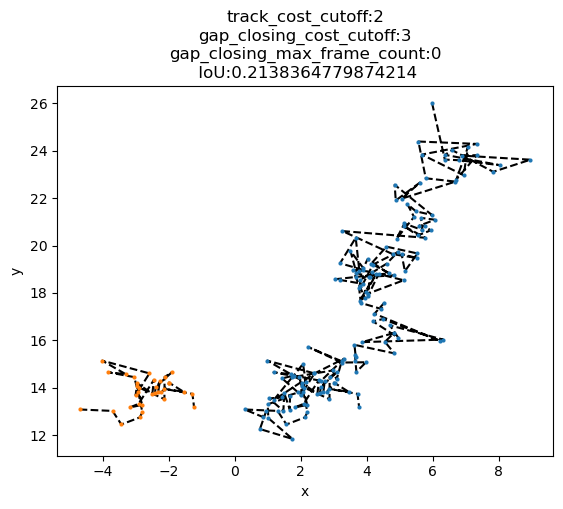

In [21]:
n = change_param(2,3,0,plt.subplot(1,1,1))

In [22]:
get_most_consecutive_frames(n)

34

# plots tracks

In [170]:
df_g = compute_IoU(track_filtered,df_gt)

In [171]:
df_g

,track_id1,track_id2,count,iou
0,6,195,84,0.965517
1,122,27,45,0.865385
2,130,7,124,0.775000
3,154,4,42,0.276316
4,306,65,99,0.792000
5,362,4,47,0.311258


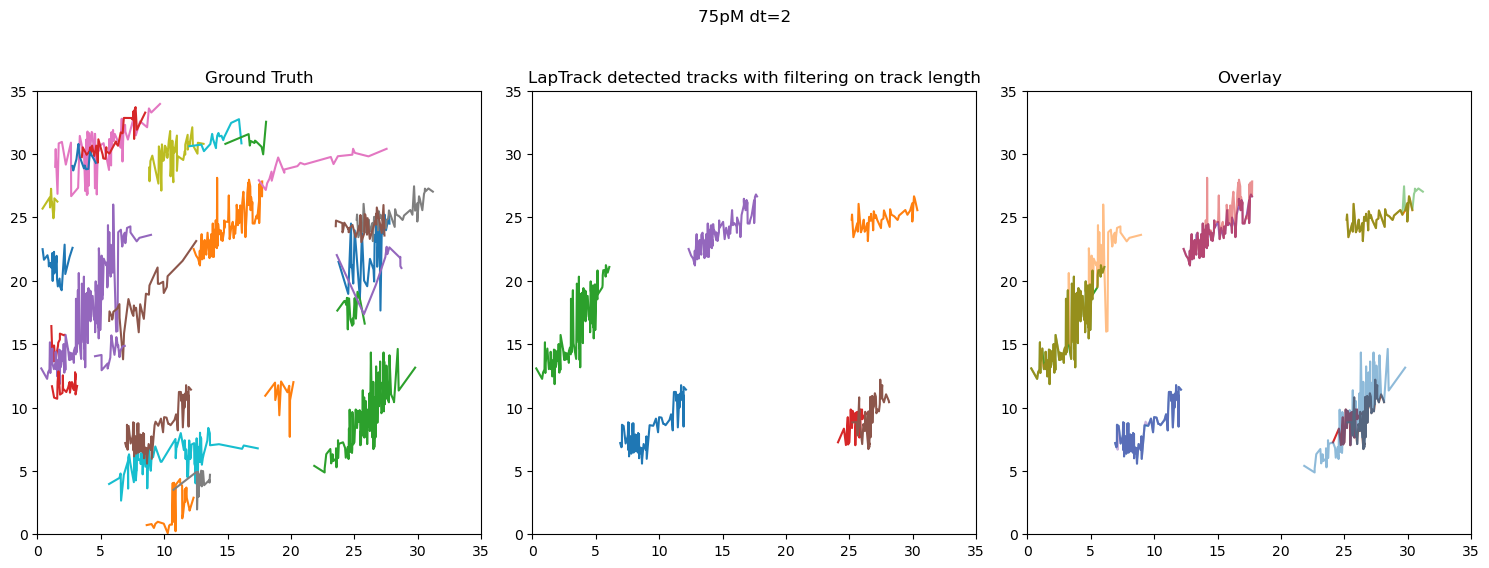

In [184]:
fig,ax = plt.subplots(1,3,figsize=(15,6))

sns.lineplot(data=df_gt,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[0])
sns.lineplot(data=track_filtered,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[1])

sns.lineplot(data=track_filtered[track_filtered.track_id.isin(df_g.track_id1)],x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2])
sns.lineplot(data=df_gt[df_gt.track_id.isin(df_g.track_id2)],x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2],alpha=0.5)

for a in ax:
    a.set_xlim(0,35)
    a.set_ylim(0,35)
    a.set_ylabel('')
    a.set_xlabel('')
    a.set_aspect('equal')

ax[0].set_title('Ground Truth')
ax[1].set_title('LapTrack detected tracks with filtering on track length')
ax[2].set_title('Overlay')
fig.suptitle('75pM dt=2')
fig.tight_layout()
plt.savefig('plots/laptrack_filtered_tracks_75pM_dt_2_best_param.png',dpi=300)

## Same as above but for 50pM

In [185]:
df_gt = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/50pM/dt_2/filtered_tracks/test_ground_truth.csv')

In [186]:
df_exp_detections = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/50pM/dt_2/filtered_tracks/exp_50pM_seq_0.csv')

In [187]:
track_cost_cutoff = 2.0
gap_closing_cost_cutoff = 9.0
gap_closing_max_frame_count = 4
lt = LapTrack(track_cost_cutoff=track_cost_cutoff**2,track_dist_metric='sqeuclidean',gap_closing_cost_cutoff=gap_closing_cost_cutoff**2,gap_closing_max_frame_count=gap_closing_max_frame_count) # track_cost_cutoff and gap_closing_cutoff should be the squared maximum distance", 
track_df, _, _ = lt.predict_dataframe(df_exp_detections, ["y", "x"], only_coordinate_cols=False,validate_frame=False)
track_df = track_df.reset_index()
track_df = track_df[['x','y','frame','track_id']]
u, c = np.unique(track_df.track_id.values, return_counts=True)
dup = u[c > 1]
track_m = track_df[track_df.track_id.isin(dup)]

In [188]:
track_m.rename(columns={'x':'a'},inplace=True)
track_m.rename(columns={'y':'x'},inplace=True)
track_m.rename(columns={'a':'y'},inplace=True)

/scratch/louaness/ipykernel_237026/3374208685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'x':'a'},inplace=True)
/scratch/louaness/ipykernel_237026/3374208685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'y':'x'},inplace=True)
/scratch/louaness/ipykernel_237026/3374208685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'a':'y'},inplace=True)


In [189]:
t = track_m.groupby('track_id').size()[track_m.groupby('track_id').size() > 60]
track_filtered = track_m[track_m.track_id.isin(t.index)]

In [190]:
df_g = compute_IoU(track_filtered,df_gt)

In [191]:
df_g

,track_id1,track_id2,count,iou
0,54,14,61,0.642105


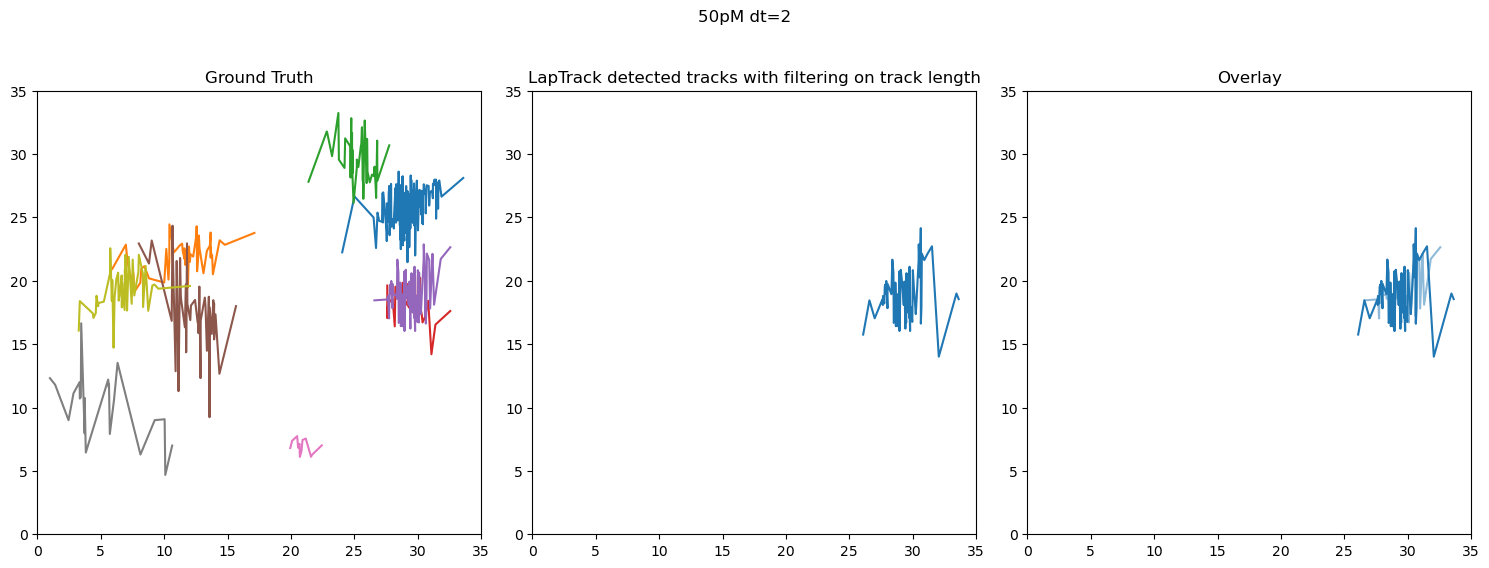

In [192]:
fig,ax = plt.subplots(1,3,figsize=(15,6))

sns.lineplot(data=df_gt,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[0])
sns.lineplot(data=track_filtered,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[1])

sns.lineplot(data=track_filtered[track_filtered.track_id.isin(df_g.track_id1)],x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2])
sns.lineplot(data=df_gt[df_gt.track_id.isin(df_g.track_id2)],x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2],alpha=0.5)

for a in ax:
    a.set_xlim(0,35)
    a.set_ylim(0,35)
    a.set_ylabel('')
    a.set_xlabel('')
    a.set_aspect('equal')

ax[0].set_title('Ground Truth')
ax[1].set_title('LapTrack detected tracks with filtering on track length')
ax[2].set_title('Overlay')
fig.suptitle('50pM dt=2')
fig.tight_layout()
plt.savefig('plots/laptrack_filtered_tracks_50pM_dt_2_best_param.png',dpi=300)

## 100 pM

In [193]:
df_gt = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/100pM/dt_2/large_sweep/test_ground_truth.csv')
df_exp_detections = pd.read_csv('/tungstenfs/scratch/ggiorget/nessim/snakemake/benchmark_tracking/results/100pM/dt_2/large_sweep/exp_100pM_seq_0.csv')

In [194]:
track_cost_cutoff = 3.0
gap_closing_cost_cutoff = 1.5
gap_closing_max_frame_count = 2
lt = LapTrack(track_cost_cutoff=track_cost_cutoff**2,track_dist_metric='sqeuclidean',gap_closing_cost_cutoff=gap_closing_cost_cutoff**2,gap_closing_max_frame_count=gap_closing_max_frame_count) # track_cost_cutoff and gap_closing_cutoff should be the squared maximum distance", 
track_df, _, _ = lt.predict_dataframe(df_exp_detections, ["y", "x"], only_coordinate_cols=False,validate_frame=False)
track_df = track_df.reset_index()
track_df = track_df[['x','y','frame','track_id']]
u, c = np.unique(track_df.track_id.values, return_counts=True)
dup = u[c > 1]
track_m = track_df[track_df.track_id.isin(dup)]

In [195]:
track_m.rename(columns={'x':'a'},inplace=True)
track_m.rename(columns={'y':'x'},inplace=True)
track_m.rename(columns={'a':'y'},inplace=True)

/scratch/louaness/ipykernel_237026/3374208685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'x':'a'},inplace=True)
/scratch/louaness/ipykernel_237026/3374208685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'y':'x'},inplace=True)
/scratch/louaness/ipykernel_237026/3374208685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_m.rename(columns={'a':'y'},inplace=True)


In [196]:
t = track_m.groupby('track_id').size()[track_m.groupby('track_id').size() > 50]
track_filtered = track_m[track_m.track_id.isin(t.index)]
df_g = compute_IoU(track_filtered,df_gt)

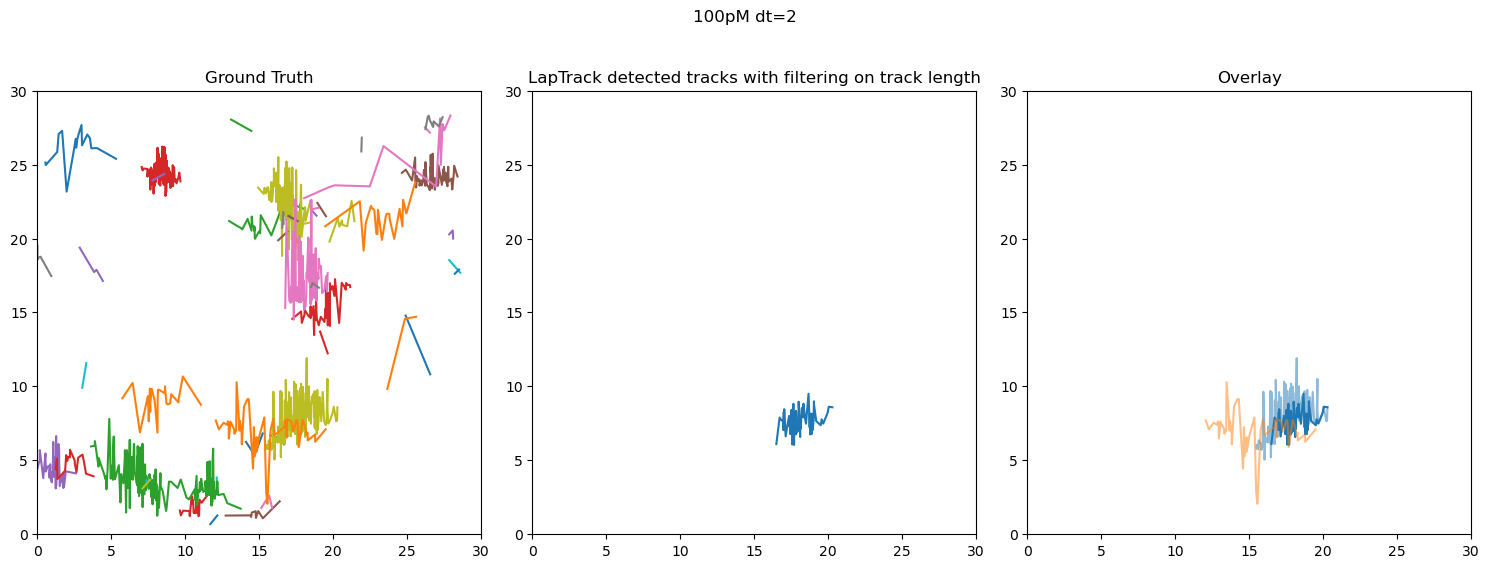

In [198]:
fig,ax = plt.subplots(1,3,figsize=(15,6))

sns.lineplot(data=df_gt,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[0])
sns.lineplot(data=track_filtered,x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[1])

sns.lineplot(data=track_filtered[track_filtered.track_id.isin(df_g.track_id1)],x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2])
sns.lineplot(data=df_gt[df_gt.track_id.isin(df_g.track_id2)],x='x',y='y',hue='track_id',legend=False,palette='tab10',ax=ax[2],alpha=0.5)

for a in ax:
    a.set_xlim(0,30)
    a.set_ylim(0,30)
    a.set_ylabel('')
    a.set_xlabel('')
    a.set_aspect('equal')

ax[0].set_title('Ground Truth')
ax[1].set_title('LapTrack detected tracks with filtering on track length')
ax[2].set_title('Overlay')
fig.suptitle('100pM dt=2')
fig.tight_layout()
plt.savefig('plots/laptrack_filtered_tracks_100pM_dt_2_best_param.png',dpi=300)